In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras import regularizers
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = keras.Input(shape = (28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(img)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
enc = layers.MaxPooling2D((2, 2), padding = 'same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(enc)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
dec = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(img, dec)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [3]:
(xtrain,_), (xtest,_) = mnist.load_data()
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255
xtrain = np.reshape(xtrain, (len(xtrain), 28, 28, 1))
xtest = np.reshape(xtest, (len(xtest), 28, 28, 1))

In [4]:
autoencoder.fit(xtrain, xtrain, epochs = 50, batch_size = 128, shuffle = True, validation_data = (xtest, xtest),
                callbacks = [TensorBoard(log_dir = '/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 32s 67ms/step - loss: 0.2134 - val_loss: 0.1489
Epoch 2/50
469/469 [==============================] - 30s 63ms/step - loss: 0.1377 - val_loss: 0.1271
Epoch 3/50
469/469 [==============================] - 29s 62ms/step - loss: 0.1230 - val_loss: 0.1177
Epoch 4/50
469/469 [==============================] - 29s 62ms/step - loss: 0.1162 - val_loss: 0.1127
Epoch 5/50
469/469 [==============================] - 29s 62ms/step - loss: 0.1120 - val_loss: 0.1092
Epoch 6/50
469/469 [==============================] - 29s 62ms/step - loss: 0.1093 - val_loss: 0.1072
Epoch 7/50
469/469 [==============================] - 30s 63ms/step - loss: 0.1073 - val_loss: 0.1051
Epoch 8/50
469/469 [==============================] - 29s 62ms/step - loss: 0.1055 - val_loss: 0.1039
Epoch 9/50
469/469 [==============================] - 34s 71ms/step - loss: 0.1042 - val_loss: 0.1027
Epoch 10/50
469/469 [==============================] - 35s 74ms/step - loss: 0.103

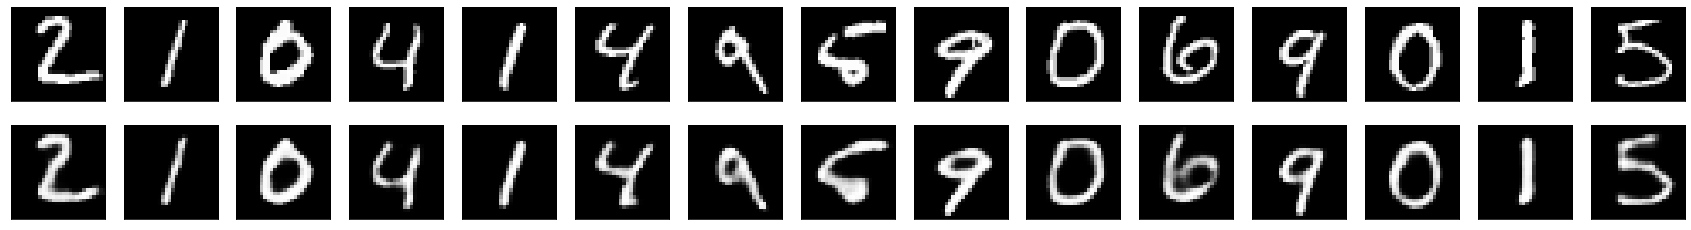

In [5]:
decimgs = autoencoder.predict(xtest)

n = 15
plt.figure(figsize = (30, 4))
for i in range(1, n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decimgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()